In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

import xgboost as xgb
import pickle

In [2]:
r16_tab1 = pd.read_excel('C:\\Users\\user\\deep_learning\\MDMS\\DataCompters\\R16\\R16_Tfo1_2022-11-15_19\\R16_Tfo1_2022-11-16.xlsx')

In [3]:
r16_tab1=r16_tab1.loc[r16_tab1.type_mesure.isin(['energie', 'facteur_puissance', 'frequence',
                                                 'puissance_active', 'puissance_apparente',
                                                 'puissance_reactive', 'taux_de_charge',
                                                 'tdh_courant', 'tdh_tension', 'temperature_tranfo',
                                                 'temperature_point_chaud_bt'])]


In [4]:
mon_dictionnaire = {'energie': int(1), 'facteur_puissance': int(2), 'frequence':int(3),
                    'puissance_active':int(4), 'puissance_apparente':int(5),
                    'puissance_reactive':int(6), 'taux_de_charge':int(7), 'tdh_courant':int(8),
                    'tdh_tension':int(9), 'temperature_tranfo':int(10), 'temperature_point_chaud_bt':int(11)}


r16_tab1 = r16_tab1.set_index('date_heure_mesure')
r16_tab1.index = pd.to_datetime(r16_tab1.index)


def create_features(r16_tab1):
            """
            Create time series features based on time series index.
            """
            r16_tab1 = r16_tab1.copy()
            r16_tab1['heure_mesure'] = r16_tab1.index.hour
            r16_tab1['minute_mesure'] = (r16_tab1.index.minute)
        #     r16_tab1['seconde_mesure'] = r16_tab1.index.second
            # r16_tab1['depart'] =r16_tab1.depart
            r16_tab1['type_mesure'] = r16_tab1.type_mesure
            r16_tab1['phase'] = r16_tab1.phase
            return r16_tab1

for type_mesure, encoder in mon_dictionnaire.items():
        # print("l'élément de clé", type_mesure, "vaut", encoder)
        r16_tab1_2 = r16_tab1.copy()

        r16_tab1_2['type_mesure'] = r16_tab1_2['type_mesure'].map({
                             type_mesure : encoder,
                            
                             },
                             na_action=None)

        r16_tab1_2['phase']= r16_tab1_2['phase'].replace(['N', np.nan],[4, 5])
        # set(r16_tab1.phase)
        r16_tab1_2 = r16_tab1_2.dropna(subset='type_mesure')
        r16_tab1_2['phase']=r16_tab1_2['phase'].astype(int)


        train = r16_tab1_2
        test = r16_tab1_2

        r16_tab1_2 = create_features(r16_tab1_2)
        train = create_features(train)
        test = create_features(test)

        FEATURES = ['type_mesure', 'phase', 'heure_mesure', 'minute_mesure']
        TARGET = 'mesure'

        X_train = train[FEATURES]
        y_train = train[TARGET]

        X_test = test[FEATURES]
        y_test = test[TARGET]

        reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                            n_estimators=10000,
                            early_stopping_rounds=50,
                            objective='reg:linear',
                            max_depth=3,
                            learning_rate=0.001)
        reg.fit(X_train, y_train,
                eval_set=[(X_train, y_train), (X_test, y_test)],
                verbose=100)
                
        filename = f'r16_Tfo1_{type_mesure}'

        with open(f'{filename}.pkl', "wb") as f:
            pickle.dump(reg, f)



[00:35:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:24.17007	validation_1-rmse:24.17007
[100]	validation_0-rmse:21.89251	validation_1-rmse:21.89251
[200]	validation_0-rmse:19.82964	validation_1-rmse:19.82964
[300]	validation_0-rmse:17.96121	validation_1-rmse:17.96121
[400]	validation_0-rmse:16.26891	validation_1-rmse:16.26891
[500]	validation_0-rmse:14.73615	validation_1-rmse:14.73615
[600]	validation_0-rmse:13.34789	validation_1-rmse:13.34789
[700]	validation_0-rmse:12.09052	validation_1-rmse:12.09052
[800]	validation_0-rmse:10.95171	validation_1-rmse:10.95171
[900]	validation_0-rmse:9.92030	validation_1-rmse:9.92030
[1000]	validation_0-rmse:8.98616	validation_1-rmse:8.98616
[1100]	validation_0-rmse:8.14014	validation_1-rmse:8.14014
[1200]	validation_0-rmse:7.37395	validation_1-rmse:7.37

In [ ]:
mon_dictionnaire = {'energie': int(1), 'facteur_puissance': int(2), 'frequence':int(3),
                    'puissance_active':int(4), 'puissance_apparente':int(5),
                    'puissance_reactive':int(6), 'taux_de_charge':int(7), 'tdh_courant':int(8),
                    'tdh_tension':int(9), 'temperature_tranfo':int(10), 'temperature_point_chaud_bt':int(11)}

                

In [ ]:
r16_tab1

In [10]:
test = r16_tab1.copy()

test['type_mesure'] = test['type_mesure'].map({
                             'frequence' : int(3),                           
                             },
                             na_action=None)

test['phase']= test['phase'].replace(['N', np.nan],[4, 5])
        # set(r16_tab1.phase)
test = test.dropna(subset='type_mesure')
test['phase']=test['phase'].astype(int)
test = create_features(test)
X_test = test[FEATURES]

with open('r16_Tfo1_frequence.pkl', "rb") as f:
    reg = pickle.load(f)

test['prediction'] = reg.predict(X_test)
test

,type_mesure,phase,mesure,heure_mesure,minute_mesure,prediction
date_heure_mesure,,,,,,
2022-11-16 00:00:25,3.0,5,50.09,0,0,50.133087
2022-11-16 00:01:25,3.0,5,50.12,0,1,50.133087
2022-11-16 00:02:25,3.0,5,50.12,0,2,50.133087
2022-11-16 00:03:25,3.0,5,50.11,0,3,50.136448
2022-11-16 00:04:25,3.0,5,50.11,0,4,50.136368
...,...,...,...,...,...,...
2022-11-16 23:52:40,3.0,5,50.12,23,52,50.132557
2022-11-16 23:53:40,3.0,5,50.12,23,53,50.134975
2022-11-16 23:54:40,3.0,5,50.15,23,54,50.136387


<function matplotlib.pyplot.show(close=None, block=None)>

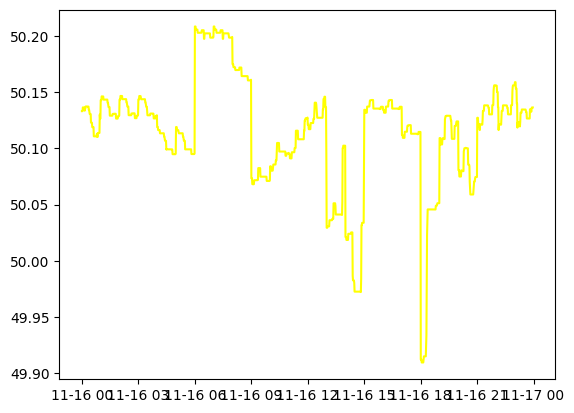

In [11]:
voir_test = test.loc[(test['type_mesure'] == 3) ]

a = voir_test.index
b = voir_test.prediction
# c = voir_test.index
# d = voir_test.prediction

# plt.figure(figsize=(12, 8))
# plt.subplot(3,1,1)
plt.plot(a, b, c='yellow')
# plt.plot(c,d, c='yellow')
plt.show

In [51]:
# r16_tab1 = r16_tab1.set_index('date_heure_mesure')
# r16_tab1.index = pd.to_datetime(r16_tab1.index)

def create_features(r16_tab1):
            """
            Create time series features based on time series index.
            """
            r16_tab1 = r16_tab1.copy()
            r16_tab1['heure_mesure'] = r16_tab1.index.hour
            r16_tab1['minute_mesure'] = (r16_tab1.index.minute)
        #     r16_tab1['seconde_mesure'] = r16_tab1.index.second
            r16_tab1['depart'] =r16_tab1.depart
            r16_tab1['type_mesure'] = r16_tab1.type_mesure
            r16_tab1['phase'] = r16_tab1.phase
            return r16_tab1

test = create_features(r16_tab1)

FEATURES = ['depart', 'type_mesure', 'phase', 'heure_mesure', 'minute_mesure']
TARGET = 'mesure'

# X_train = train[FEATURES]
# y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

with open('r16_tab1_tdh_tension.pkl', "rb") as f:
    reg = pickle.load(f)

test['prediction'] = reg.predict(X_test)
test

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:type_mesure: object, phase: object

In [ ]:
mere = test.copy()
mere['laisse'] = 'seconde_mesure'
test

In [ ]:
mon_dictionnaire = {'energie': int(1), 'facteur_puissance': int(2), 'frequence':int(3),
                    'puissance_active':int(4), 'puissance_apparente':int(5),
                    'puissance_reactive':int(6), 'taux_de_charge':int(7), 'tdh_courant':int(8),
                    'tdh_tension':int(9), 'temperature_tranfo':int(10), 'temperature_point_chaud_bt':int(11)}

                

In [44]:
r16_tab1.loc[r16_tab1['type_mesure']== 'tdh_courant'].drop_duplicates(subset='depart')

,depart,type_mesure,phase,mesure,date_heure_mesure
1068,1,tdh_courant,1,8.50,2022-11-19 00:00:45
1080,2,tdh_courant,3,8.52,2022-11-19 00:00:45
1095,3,tdh_courant,2,9.83,2022-11-19 00:00:45
1168,4,tdh_courant,3,23.64,2022-11-19 00:00:45


In [43]:
r16_tab1.loc[(r16_tab1['type_mesure'] == 'tdh_courant')]

,depart,type_mesure,phase,mesure,date_heure_mesure
0,1,tension_ph,1,406.90,2022-11-18 23:59:25
1,1,tension_n,3,235.32,2022-11-18 23:59:25
2,1,tension_n,1,236.07,2022-11-18 23:59:25
3,1,tension_ph,3,408.70,2022-11-18 23:59:25
4,1,courant,2,11.89,2022-11-18 23:59:25
...,...,...,...,...,...
1048570,4,tension_n,3,234.51,2022-11-19 22:38:10
1048571,4,desequilibre_courant,2,127.94,2022-11-19 22:38:10
1048572,4,desequilibre_tension,2,0.32,2022-11-19 22:38:10
1048573,3,courant,N,15.95,2022-11-19 22:38:11


In [ ]:
bt= r16_tab1.copy
bt
bt['type_mesure'].loc[bt['type_mesure']== 1] = eng.predict(bt)


In [43]:
import pickle
import itertools
import numpy as np
import pandas as pd
import datetime
import random

a = [[1,2,3,4,5,6,7,8,9,10,11],[1,2,3,4,5]]
famille = list(itertools.product(*a))

my_data = []
for i in famille:
    my_data.append(list(i))

my_data = np.array(my_data)

column_names = ["type_mesure", "phase"]
data_df = pd.DataFrame(my_data, columns=column_names)
data = data_df.drop((data_df.loc[(data_df['type_mesure'].isin([1,2,3,7,10])) & (data_df['phase'].isin([1,2,3,4]))].index) |
(data_df.loc[(data_df['type_mesure'].isin([4,5,6,8,9])) & (data_df['phase'].isin([4,5]))].index) |
(data_df.loc[(data_df['type_mesure'].isin([11])) & (data_df['phase'].isin([5]))].index))
data

C:\Users\user\AppData\Local\Temp\ipykernel_8600\1153327368.py:19: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  data = data_df.drop((data_df.loc[(data_df['type_mesure'].isin([1,2,3,7,10])) & (data_df['phase'].isin([1,2,3,4]))].index) |


,type_mesure,phase
4,1,5
9,2,5
14,3,5
15,4,1
16,4,2
17,4,3
20,5,1
21,5,2
22,5,3
25,6,1


In [44]:
hr = int(datetime.datetime.now().strftime("%H"))
mn = int(datetime.datetime.now().strftime("%M"))
da_hr_ms = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
 
data['heure_mesure'] = hr
data['minute_mesure'] = mn


In [63]:
mon_dictionnaire = {'energie': int(1), 'facteur_puissance': int(2), 'frequence':int(3),
                    'puissance_active':int(4), 'puissance_apparente':int(5),
                    'puissance_reactive':int(6), 'taux_de_charge':int(7), 'tdh_courant':int(8),
                    'tdh_tension':int(9), 'temperature_tranfo':int(10), 'temperature_point_chaud_bt':int(11)}

                

In [45]:
with open('r16_Tfo1_energie.pkl', "rb") as a:
    eng = pickle.load(a)
with open('r16_Tfo1_facteur_puissance.pkl', "rb") as b:
    fct_p = pickle.load(b)
with open('r16_Tfo1_frequence.pkl', "rb") as c:
    freq = pickle.load(c)
with open('r16_Tfo1_puissance_active.pkl', "rb") as d:
    pui_act = pickle.load(d)
with open('r16_Tfo1_puissance_apparente.pkl', "rb") as e:
    pui_app = pickle.load(e)
with open('r16_Tfo1_puissance_reactive.pkl', "rb") as f:
    pui_rea = pickle.load(f)
with open('r16_Tfo1_taux_de_charge.pkl', "rb") as g:
    tx_ch = pickle.load(g)
with open('r16_Tfo1_tdh_courant.pkl', "rb") as h:
    tdh_c = pickle.load(h)
with open('r16_Tfo1_tdh_tension.pkl', "rb") as i:
    tdh_t = pickle.load(i)
with open('r16_Tfo1_temperature_tranfo.pkl', "rb") as j:
    tmp_tfo = pickle.load(j)
with open('r16_Tfo1_temperature_point_chaud_bt.pkl', "rb") as k:
    tmp_pt_ch = pickle.load(k)


   
# data['mesure'] = data['type_mesure']
# df1 = data.loc[data['type_mesure']==1]
data_omo = data.copy()

data['type_mesure'].loc[data['type_mesure']==1] = eng.predict(data_omo.loc[data['type_mesure']==1])
data['type_mesure'].loc[data['type_mesure']==2] = fct_p.predict(data_omo.loc[data_omo['type_mesure']== 2])
data['type_mesure'].loc[data['type_mesure']==3] = freq.predict(data_omo.loc[data_omo['type_mesure']== 3])
data['type_mesure'].loc[data['type_mesure']==4] = pui_act.predict(data_omo.loc[data_omo['type_mesure']== 4])
data['type_mesure'].loc[data['type_mesure']==5] = pui_app.predict(data_omo.loc[data_omo['type_mesure']== 5])
data['type_mesure'].loc[data['type_mesure']==6] = pui_rea.predict(data_omo.loc[data_omo['type_mesure']== 6])
data['type_mesure'].loc[data['type_mesure']==7] = tx_ch.predict(data_omo.loc[data_omo['type_mesure']== 7])
data['type_mesure'].loc[data['type_mesure']==8] = tdh_c.predict(data_omo.loc[data_omo['type_mesure']== 8])
data['type_mesure'].loc[data['type_mesure']==9] = tdh_t.predict(data_omo.loc[data_omo['type_mesure']== 9])
data['type_mesure'].loc[data['type_mesure']==10] = tmp_tfo.predict(data_omo.loc[data_omo['type_mesure']== 10])
data['type_mesure'].loc[data['type_mesure']==11] = tmp_pt_ch.predict(data_omo.loc[data_omo['type_mesure']== 11])

data

C:\Users\user\AppData\Local\Temp\ipykernel_8600\3639275060.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type_mesure'].loc[data['type_mesure']==1] = eng.predict(data_omo.loc[data['type_mesure']==1])


,type_mesure,phase,heure_mesure,minute_mesure
4,24.339998,5,2,53
9,95.505470,5,2,53
14,50.126869,5,2,53
15,16842.800781,1,2,53
16,18061.976562,2,2,53
17,18954.419922,3,2,53
20,17547.781250,1,2,53
21,19078.806641,2,2,53
22,20135.328125,3,2,53
25,4263.085938,1,2,53


In [46]:
data['mesure'] = data['type_mesure']
data['type_mesure'] = data_omo['type_mesure']
data

,type_mesure,phase,heure_mesure,minute_mesure,mesure
4,1,5,2,53,24.339998
9,2,5,2,53,95.505470
14,3,5,2,53,50.126869
15,4,1,2,53,16842.800781
16,4,2,2,53,18061.976562
17,4,3,2,53,18954.419922
20,5,1,2,53,17547.781250
21,5,2,2,53,19078.806641
22,5,3,2,53,20135.328125
25,6,1,2,53,4263.085938


In [48]:
data['type_mesure'] = data['type_mesure'].map({
                             1:'energie',
                             2:'facteur_puissance',
                             3:'frequence',
                             4:'puissance_active',
                             5:'puissance_apparente',
                             6:'puissance_reactive',
                             7:'taux_de_charge',
                             8:'tdh_courant',
                             9:'tdh_tension',
                             10:'temperature_tranfo',
                             11:'temperature_point_chaud_bt',
                             },
                             na_action=None)

data['phase']= data['phase'].replace([4, 5],['N', ''])


In [47]:
data['date_heure_mesure'] = da_hr_ms
data = data.drop(columns=['heure_mesure', 'minute_mesure'])


In [49]:

data['id_poste'] = 'P0016.210.043'
data['zone_poste'] = 'transfo1'
data['classification'] = 'CLA_BT'
data['date_heure_transfert'] = da_hr_ms
data['unite_mesure'] = data['type_mesure']
data['unite_mesure'].loc[data['unite_mesure'].isin(['energie'])] = 'MWh'
data['unite_mesure'].loc[data['unite_mesure'].isin(['temperature_tranfo', 'temperature_point_chaud_bt'])] = '°C'
data['unite_mesure'].loc[data['unite_mesure'].isin(['frequence'])] = 'Hz'
data['unite_mesure'].loc[data['unite_mesure'].isin(['puissance_active'])] = 'W'
data['unite_mesure'].loc[data['unite_mesure'].isin(['puissance_apparente'])] = 'VA'
data['unite_mesure'].loc[data['unite_mesure'].isin(['puissance_reactive'])] = 'VAR'
data['unite_mesure'].loc[data['unite_mesure'].isin(['facteur_puissance', 'taux_de_charge', 'tdh_courant', 'tdh_tension'])] = '%'
data['phase'] = data['phase'].astype(str)
data['description_mesure'] = 'mesure - ' + data['type_mesure'] + ' phase ' +  data['phase']


C:\Users\user\AppData\Local\Temp\ipykernel_8600\2572048384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['unite_mesure'].loc[data['unite_mesure'].isin(['energie'])] = 'MWh'
C:\Users\user\AppData\Local\Temp\ipykernel_8600\2572048384.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['unite_mesure'].loc[data['unite_mesure'].isin(['temperature_tranfo', 'temperature_point_chaud_bt'])] = '°C'
C:\Users\user\AppData\Local\Temp\ipykernel_8600\2572048384.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [51]:
data = data[[
    'id_poste', 'zone_poste', 'classification', 
    'type_mesure', 'description_mesure', 'phase', 'mesure',
    'unite_mesure', 'date_heure_mesure','date_heure_transfert'
    ]]
    
data_log = data.to_json(orient = 'records', lines=True)


In [52]:
files_name = 'R16_Tab1_{}.log'.format(datetime.datetime.now().strftime("%Y-%m-%d"))

file = open(files_name, "a+")
file.write(data_log)
file.close()


In [27]:
test['prediction'] = reg.predict(X_test)


NameError: name 'reg' is not defined

In [ ]:
test.loc[(test['type_mesure']==1) & (test['depart']==2)].iloc[0:60]
